In [115]:
#predicting neuronal spike events using logistic regression

#A simple computational neuroscience model to predict neuronal spiking from recent firing history.

In [116]:
import numpy as np
import matplotlib.pyplot as plt


Notes:
I'm building a simple spike prediction model as a first computational neuroscience project. Neural Encoding is the major concept that I'm gonna work on with this project.

In [117]:
np.random.seed(42)
spikes = (np.random.rand(10000)< 0.05).astype(int)

In [118]:
print("Total time bins: ",len(spikes))
print("Spike rate: ",spikes.mean())

Total time bins:  10000
Spike rate:  0.0493


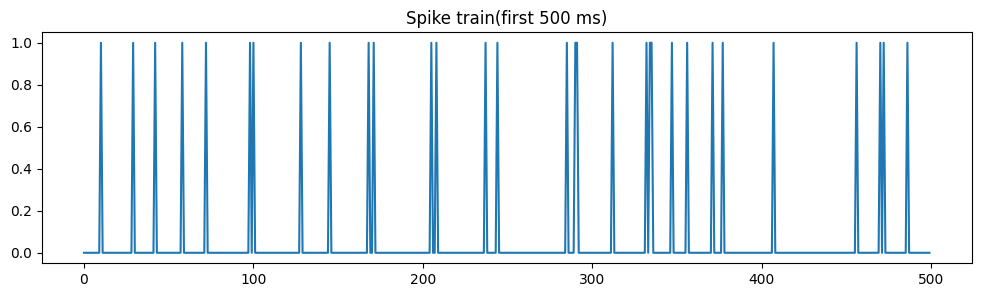

In [119]:
plt.figure(figsize=(12,3))
plt.plot(spikes[ :500])
plt.title("Spike train(first 500 ms)")
plt.show()

The neuron fires sparsely, with occasional spikes. This makes prediction non-trivial due to class imbalance.


For each time point, I use the previous N time bins as features to predict whether the neuron fires next.


In [120]:
def dataset(spikes, window = 2):
    X,y = [],[]
    for t in range(window,len(spikes)):
        X.append(spikes[t-window:t])
        y.append(spikes[t])
    return np.array(X), np.array(y)

In [121]:
X,y = dataset(spikes, window=10)
print(X.shape,y.shape)

(9990, 10) (9990,)


In [122]:
print("First X row: ",X[0])
print("First y: ",y[0])

First X row:  [0 0 0 0 0 0 0 0 0 0]
First y:  1


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,shuffle=False
)

In [124]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500,class_weight="balanced")
model.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [125]:
from sklearn.metrics import accuracy_score,roc_auc_score
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[ : ,1]

In [126]:
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("ROC AUC: ", roc_auc_score(y_test,y_prob))

Accuracy:  0.7602602602602603
ROC AUC:  0.49324363116332726


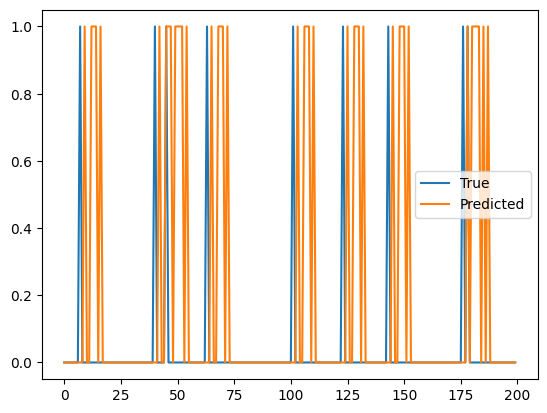

In [127]:
plt.plot(y_test[ :200],label = "True")
plt.plot(y_pred[ :200],label = "Predicted")
plt.legend()
plt.show()

The Model captures some spikes but misses many due to sparsity.

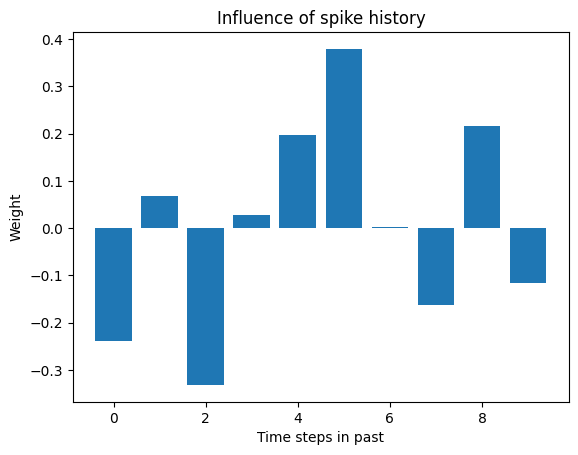

In [128]:
plt.bar(range(X.shape[1]),model.coef_[0])
plt.xlabel("Time steps in past")
plt.ylabel("Weight")
plt.title("Influence of spike history")
plt.show()

In [129]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [130]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1498,  399],
       [  80,   21]])

In [131]:
precision = precision_score(y_test,y_pred,zero_division=0)
precision

0.05

In [132]:
recall = recall_score(y_test,y_pred)
recall

0.2079207920792079

In [133]:
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Precision: 0.050
Recall: 0.208


Accuracy is misleading because the neuron is mostly silent. Precision measures how many predicted spikes were correct. Recall measures how many real spikes were detected. Low recall reflects the sparse and noisy nature of neuronal firing. 


In [134]:
def train_and_eval(window):
    X, y = dataset(spikes, window=window)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    model = LogisticRegression(max_iter=500, class_weight="balanced")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)

    return acc, roc, prec, rec

In [135]:
for w in [5, 10, 20]:
    acc, roc, prec, rec = train_and_eval(w)
    print(f"Window {w}: Acc={acc:.3f}, ROC={roc:.3f}, Prec={prec:.3f}, Rec={rec:.3f}")

Window 5: Acc=0.861, ROC=0.498, Prec=0.041, Rec=0.079
Window 10: Acc=0.760, ROC=0.493, Prec=0.050, Rec=0.208
Window 20: Acc=0.340, ROC=0.475, Prec=0.050, Rec=0.663


From a biological perspective, this indicates thst the neuron's immediate past influences firing probability, but longer spike history provides diminishing returns. this is consistent with refractory effects operating at short timescales and weak long-term self-dependence.

#Interpretation

The model learned that recent spike history has a small but measurable influence on future firing probability.
Positive weights for recent time bins suggest short-term facilitation, where recent firing increases the chance of another spike. Negative weights indicate refractory effects, where firing temporarily supresses subsequent spikes.
Despite these effects, overall prediction performance remains low because neuronal firing is sparse and influenced by factors not included in the model.
The model uses only spike history and does not include stimulus input, activity of other neurons, or internal neural states, all of which strongly influence firing.
These results suggest that spike history alone explains only a limited portion of neuronal variability, highlighting the need for stimulus-driven and population-level models.

#Limitations

1. The model uses only spike history and ignores stimulus-driven inputs.
2. Only a single neuron is modeled, so population dynamics are not captured.
3. Temporal binning simplifies spike timing and may lose fine-scale information.
4. The model assumes linear effects o spike history, limiting expensiveness.

#Possible improvements

1. Adding stimulus features to model neural encoding.
2. Incorporating spikes from other neurons to capture network effects.
3. Using poisson or point-process models suited for spike data.
4. Exploring nonlinear or recurrent architectures once interpretability is established.

In [136]:
import os
print(os.path.abspath(__file__) if "__file__" in globals() else os.getcwd())


C:\Users\ATHARVA
